In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel("/content/Social Development Bank Customers satisfaction xl.ar.en.xlsx")

df.head(10)

,Customer Number,service type,The level of service,Evaluation
0,317622,Evaluation of the service of submitting a new ...,How satisfied are you with receiving the servi...,Very satisfied
1,317622,Evaluation of the service of submitting a new ...,How satisfied are you with the procedures for ...,Very satisfied
2,317622,Evaluation of the service of submitting a new ...,How satisfied are you with the speed of receiv...,Very satisfied
3,317622,Evaluation of the service of submitting a new ...,How satisfied are you with the service outcomes?,Very satisfied
4,317622,Evaluation of the service of submitting a new ...,How satisfied are you with the website you used?,Very satisfied
5,317709,Report questionnaires,How satisfied are you with the support employe...,not satisfied
6,317709,Report questionnaires,How effective and responsive the support staff is,not satisfied
7,317709,Report questionnaires,Were you served quickly and easily?,Never satisfied
8,317709,Report questionnaires,How satisfied are you with the speed of the se...,Never satisfied
9,317749,Evaluation of the service of submitting a new ...,How satisfied are you with receiving the servi...,Very satisfied


In [ ]:
df.shape

(66208, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66208 entries, 0 to 66207
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer Number       66208 non-null  int64 
 1   service type          66208 non-null  object
 2   The level of service  66205 non-null  object
 3   Evaluation            66208 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df.columns

Index(['Customer Number', 'service type', 'The level of service',
       'Evaluation'],
      dtype='object')

In [ ]:
df.rename(columns={'The level of service': 'Level of service'}, inplace=True)

In [ ]:
df.columns

Index(['Customer Number', 'service type', 'Level of service', 'Evaluation'], dtype='object')

In [ ]:
print(df['Customer Number'].duplicated().sum())

51559


In [ ]:
df['Level of service'].value_counts()

Level of service
How satisfied are you with the support employee’s performance?          7025
How effective and responsive the support staff is                       7025
Were you served quickly and easily?                                     7025
How satisfied are you with the speed of the service?                    7025
How satisfied are you with receiving the service in general?            6891
How satisfied are you with the procedures for obtaining the service?    6891
How satisfied are you with the speed of receiving the service?          6891
How satisfied are you with the service outcomes?                        6891
How satisfied are you with the website you used?                        6891
Availability of information on the platform                              730
Easy access to the service                                               730
Ease of use of the platform                                              730
Satisfaction with the service provided                     

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Customer Number     0
service type        0
Level of service    0
Evaluation          0
dtype: int64

In [ ]:
df['Evaluation'] = df['Evaluation'].replace('middle', 'Neutral')

In [ ]:
df['service type'].value_counts()

service type
Report questionnaires                                        28100
Evaluation of the account statement service                  19155
Evaluation of the service of submitting a new application     9025
Evaluation of the debt letter service                         4985
Self-employment incentives                                    3320
Stop electronic discount                                      1270
Request for an exemption for a deceased person                 330
Evaluation disclaimer verification service                      20
Name: count, dtype: int64

In [ ]:
df['Level of service'].value_counts()

Level of service
How satisfied are you with the support employee’s performance?          7025
How effective and responsive the support staff is                       7025
Were you served quickly and easily?                                     7025
How satisfied are you with the speed of the service?                    7025
How satisfied are you with receiving the service in general?            6891
How satisfied are you with the procedures for obtaining the service?    6891
How satisfied are you with the speed of receiving the service?          6891
How satisfied are you with the service outcomes?                        6891
How satisfied are you with the website you used?                        6891
Availability of information on the platform                              730
Easy access to the service                                               730
Ease of use of the platform                                              730
Satisfaction with the service provided                     

In [ ]:
df['Evaluation'].value_counts()

Evaluation
Very satisfied     34987
Never satisfied    17553
Satisfied           6012
Neutral             4018
not satisfied       3632
Not rated              3
Name: count, dtype: int64

In [ ]:
print(df['Customer Number'].duplicated().sum())

51559


<ipython-input-17-c5022389ba28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evaluation', data=df, order=df['Evaluation'].value_counts().index, palette=palette)
<ipython-input-17-c5022389ba28>:3: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.countplot(x='Evaluation', data=df, order=df['Evaluation'].value_counts().index, palette=palette)


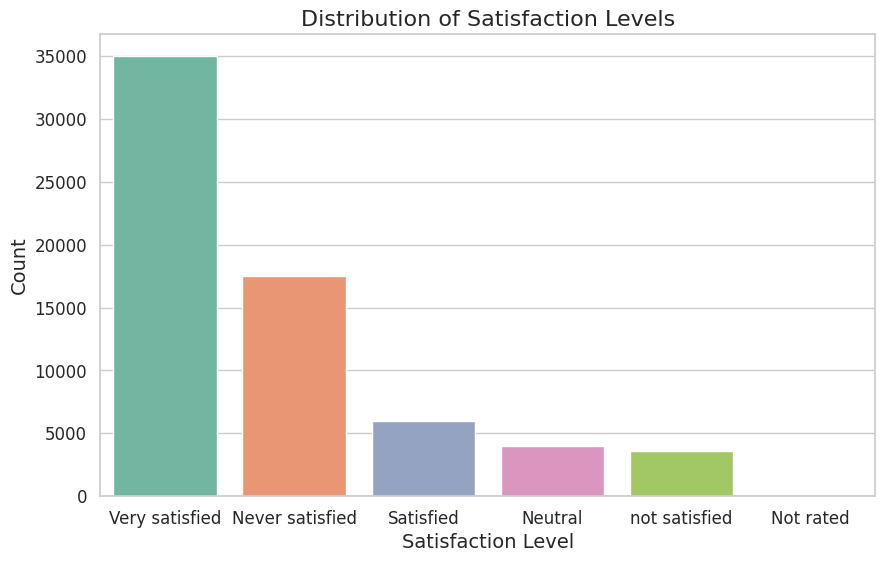

In [ ]:
# Distribution of Satisfaction Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Evaluation', data=df, order=df['Evaluation'].value_counts().index, palette=palette)
plt.title('Distribution of Satisfaction Levels', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

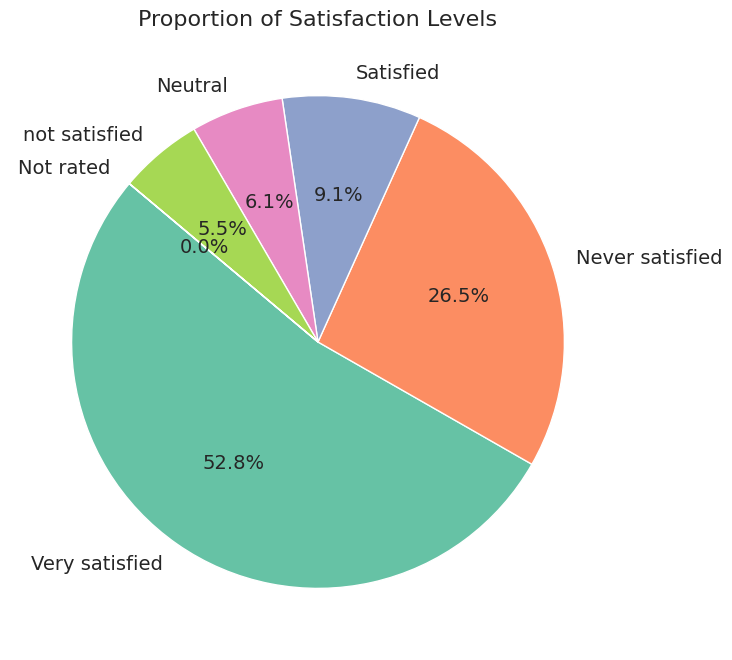

In [ ]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2", len(df['Evaluation'].unique()))
df['Evaluation'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})
plt.title('Proportion of Satisfaction Levels', fontsize=16)
plt.ylabel('')
plt.show()

<ipython-input-19-67e41bf2d7cf>:3: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.countplot(x='service type', hue='Evaluation', data=df, order=df['service type'].value_counts().index, palette=palette)


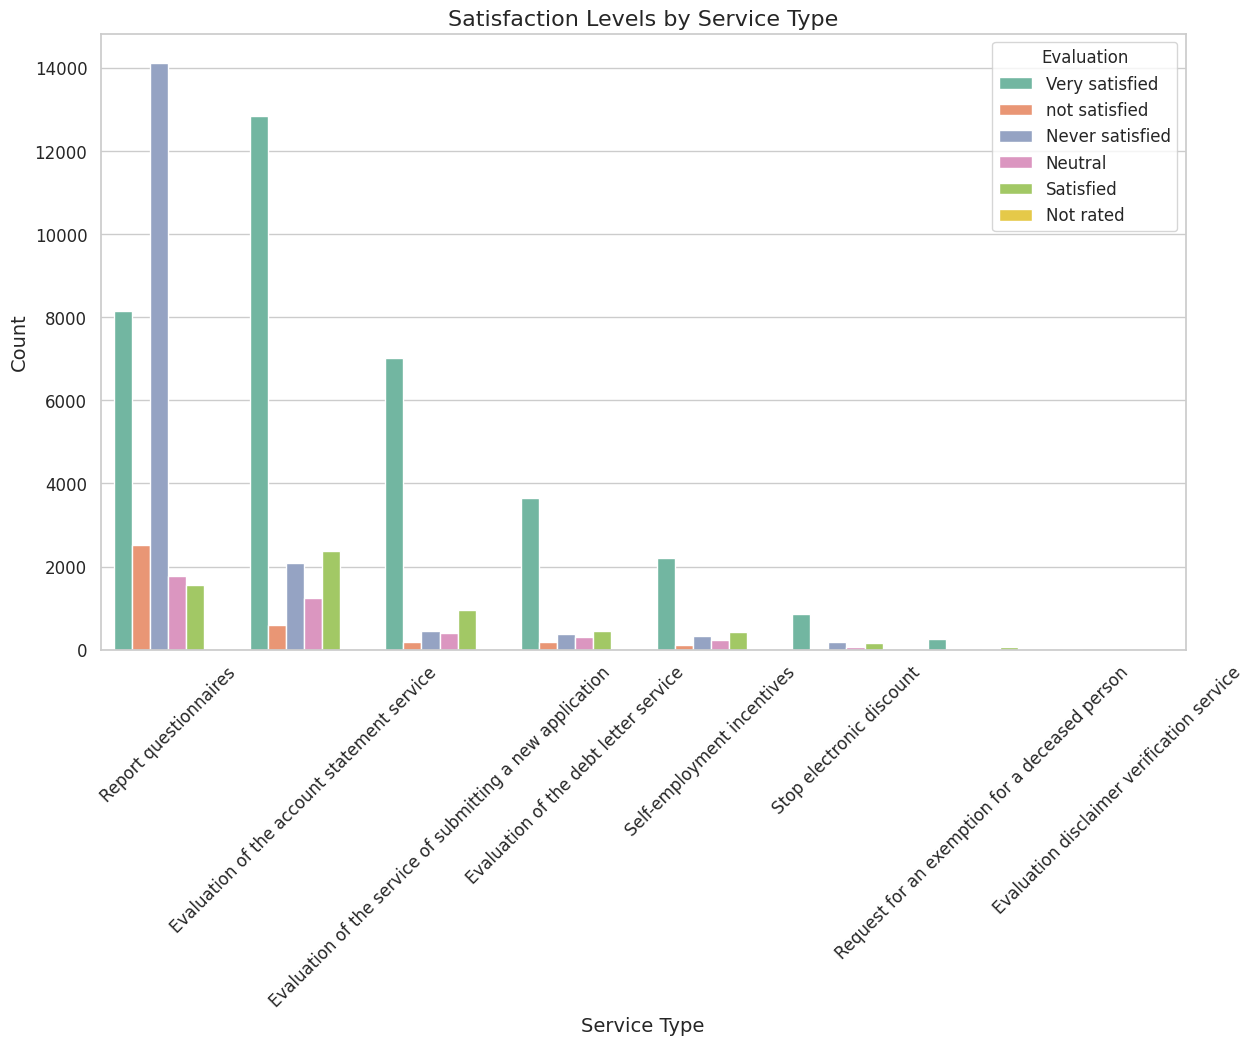

In [ ]:
# Satisfaction Levels by Service Type
plt.figure(figsize=(14, 8))
sns.countplot(x='service type', hue='Evaluation', data=df, order=df['service type'].value_counts().index, palette=palette)
plt.title('Satisfaction Levels by Service Type', fontsize=16)
plt.xlabel('Service Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Evaluation', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-20-ebd6e4ec8d54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Level of service', data=df, order=df['Level of service'].value_counts().index, palette=palette)
<ipython-input-20-ebd6e4ec8d54>:3: UserWarning: 
The palette list has fewer values (8) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='Level of service', data=df, order=df['Level of service'].value_counts().index, palette=palette)


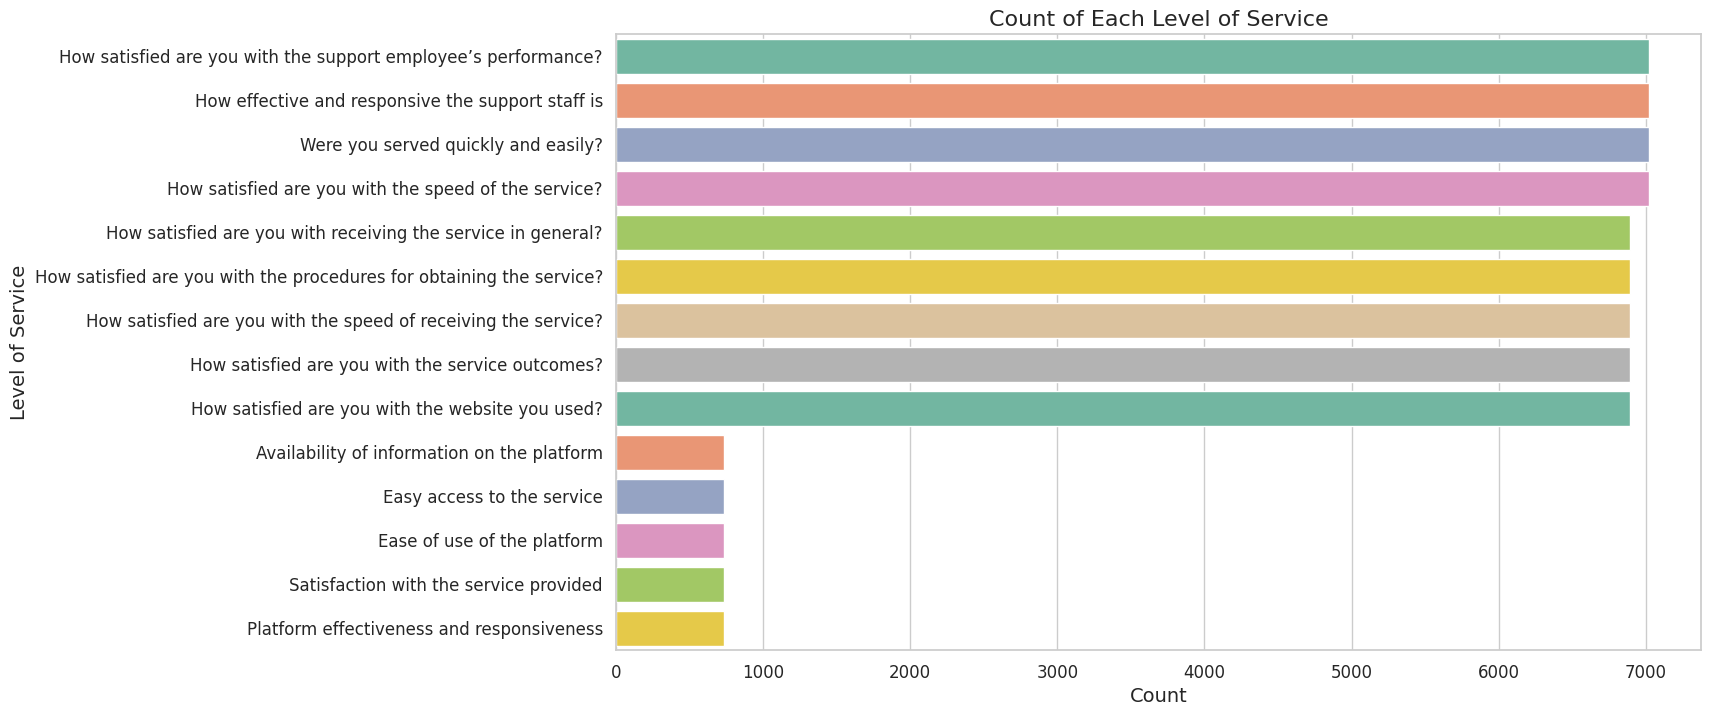

In [ ]:
# Count Plot for Level of Service
plt.figure(figsize=(14, 8))
sns.countplot(y='Level of service', data=df, order=df['Level of service'].value_counts().index, palette=palette)
plt.title('Count of Each Level of Service', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Level of Service', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-23-2b82118f4f4f>:2: UserWarning: 
The palette list has fewer values (8) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='service type', hue='Level of service', data=df, order=df['service type'].value_counts().index, palette=palette)


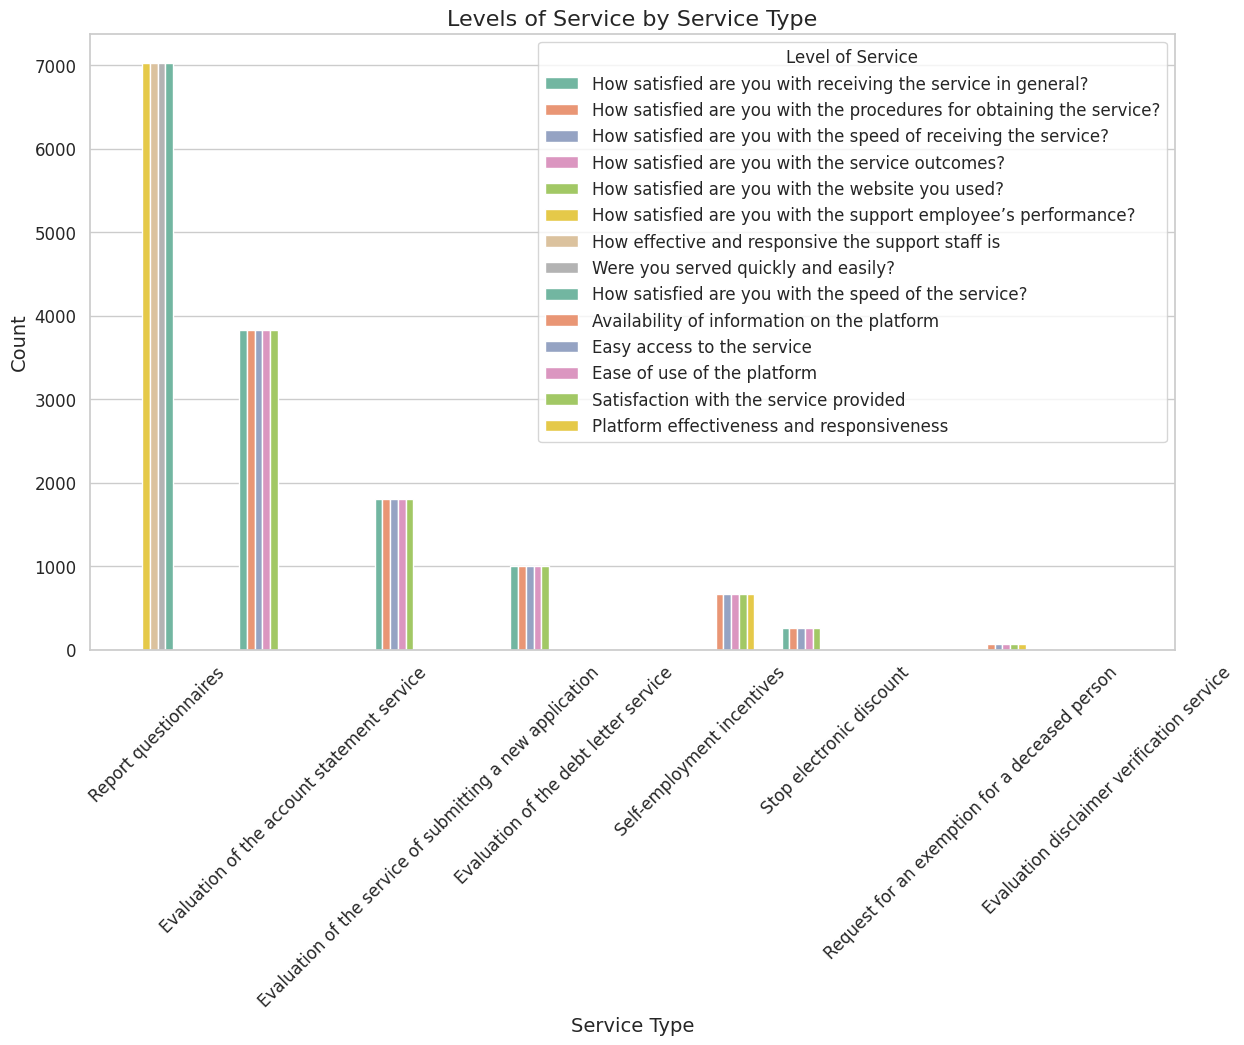

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='service type', hue='Level of service', data=df, order=df['service type'].value_counts().index, palette=palette)
plt.title('Levels of Service by Service Type', fontsize=16)
plt.xlabel('Service Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Level of Service', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df.to_excel('SDB_Updated.xlsx', index=False)